## Installing Required Packeges 

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached colorama-0.4.5-py2.py3-none-any.whl (16 kB)


You should consider upgrading via the 'c:\users\sadia asif\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=04654ee863f45a6e309b008490d134dcc88b942d364d73231bc3319f77f289f4
  Stored in directory: c:\users\sadia asif\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


You should consider upgrading via the 'c:\users\sadia asif\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=12a396365c7d3823fd05dd979a70cdbb9150b0c7cc5066b7a7e17f9e4b8a5233
  Stored in directory: c:\users\sadia asif\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


You should consider upgrading via the 'c:\users\sadia asif\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sadia asif\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## Importing libraries/ Packages required for this project

In [ ]:
%%time
from getpass import getpass
import os
import sys
from pywt import families
from scipy.signal import welch
import math
from bs4 import BeautifulSoup
from pywt import wavedec ,swt ,Wavelet , ContinuousWavelet , scale2frequency_rangeuency, cwt
import requests
import re
import wget
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyedflib
import seaborn as sns
import glob         
from scipy import signal   
import pprint     
import re
import mne
from mne.viz import plot_filter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### this is just used to print strings in different color format, for my own understanding at different points nothing else 

In [ ]:


# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

In [ ]:
cd Epileptic_Seziure_Detection 

[Errno 2] No such file or directory: 'Epileptic_Seziure_Detection'
/content/drive/MyDrive


In [ ]:
cd /MyDrive/Epileptic_Seziure_Detection 

[Errno 2] No such file or directory: '/MyDrive/Epileptic_Seziure_Detection'
/content/drive


#### Excel File Containing the description about dataset is downloaded from the official TUH website, it is being loaded here, and some values are displayed using pandas library 
There are a number of artifacts and corresponding seizure types in the TUH data with their descriptions as shown below by display function

In [ ]:

# Load excel file downloaded from TUH website
path_of_seziure_type = ''TUH Database'/seizures_types_v01.xlsx' 

data_seziure_types = pd.read_excel(path_of_seziure_type)
# Get seziure class data 
data_seziure_types = data_seziure_types.set_index('Class Code') 
## show output
display(data_seziure_types)

,Class No.,Event Name,Signs,Locality,Description
Class Code,,,,,
NaN,0,No Event,NaN,NaN,An unclassified event
SPSW,1,Spike/Sharp and Wave,Electrographic,All,"Spike and wave/complexes , sharp and wave/comp..."
GPED,2,Generalized Periodic Epileptiform Discharges,Electrographic,Generalized,Diffused periodic discharges
PLED,3,Periodic Lateralized Epileptiform Discharges,Electrographic,Hemispheric/Focal,Focal periodic discharges
EYBL,4,Eye blink,Clinical & Electrographic,Focal,"A specific type of sharp, high amplitude eye m..."
ARTF,5,Artifacts (All),Clinical & Electrographic,All,"Any non-brain activity electrical signal, such..."
BCKG,6,Background,Electrographic,NaN,Baseline/non-interesting events
SEIZ,7,Seizure,Clinical &| Electrographic,All,Common seizure class which can include all typ...
FNSZ,8,Focal Non-Specific Seizure,Electrographic,Hemispheric/Focal,Focal seizures which cannot be specified with ...


Lets have a look at the training set first. We must separate it since there are several portions of information in the same exel file.
Therefore, we shall examine some broad summaries of the training set in this cell.

In [ ]:
# Path where info_meta_data file is placed wrt current directory
path_of_seziure_info = 'TUH Database/seizures_v32r.xlsx'
#load info_meta_data file downloaded from website
training_info_data = pd.read_excel(path_of_seziure_info, 'train')
# get train data
training_seziure_types = training_info_data.iloc[1:12,26:30]
# Get respective columns
training_seziure_types.columns = ['Class Code', 'Events', 'frequency_range.', 'Cum.']
training_seziure_types = training_seziure_types.set_index('Class Code')
training_seziure_types.join(data_seziure_types) 

,Events,Freq.,Cum.,Class No.,Event Name,Signs,Locality,Description
Class Code,,,,,,,,
FNSZ,1536,0.648101,0.648101,8.0,Focal Non-Specific Seizure,Electrographic,Hemispheric/Focal,Focal seizures which cannot be specified with ...
GNSZ,408,0.172152,0.820253,9.0,Generalized Non-Specific Seizure,Electrographic,Generalized,Generalized seizures which cannot be further c...
SPSZ,49,0.020675,0.840928,10.0,Simple Partial Seizure,Clinical & Electrographic,All,Partial seizures during consciousness; Type sp...
CPSZ,277,0.116878,0.957806,11.0,Complex Partial Seizure,Clinical & Electrographic,All,Partial Seizures during unconsciousness; Type ...
ABSZ,50,0.021097,0.978903,12.0,Absence Seizure,Clinical & Electrographic,Generalized,Absence Discharges observed on EEG; patient lo...
TNSZ,18,0.007595,0.986498,13.0,Tonic Seizure,Clinical & Electrographic,All,Stiffening of body during seizure (EEG effects...
CNSZ,0,0,0.986498,14.0,Clonic Seizure,Clinical & Electrographic,All,Jerking/shivering of body during seizure
TCSZ,30,0.012658,0.999156,15.0,Tonic Clonic Seizure,Clinical & Electrographic,All,At first stiffening and then jerking of body (...
ATSZ,0,0,0.999156,16.0,Atonic Seizure,Clinical & Electrographic,NaN,Sudden loss of muscle tone


This cell explains where sessions were recorded along with description key
* Get description of data with respect to sessions where they are recorded
* get desired columns
* remove irrelevent

In [ ]:


training_keys_types = training_info_data.iloc[24:43,16:21]
training_summary_types = training_info_data.iloc[1:7,16:20]

training_summary_types.columns = ['EEG Type', 'Sessions', 'frequency_range.', 'Cum.']
training_keys_types.columns = ['EEG Type', 'EEG SubType', 'Rooms', 'REMOVE', 'Description']
training_summary_types = training_summary_types.set_index('EEG Type')

training_keys_types = training_keys_types.drop(['Rooms','REMOVE'], axis = 1)
desc = training_keys_types[training_keys_types.isnull().any(axis=1)].iloc[:-1]
training_keys_types['EEG Type'] = training_keys_types['EEG Type'].ffill()
training_keys_types = training_keys_types.set_index('EEG Type')

training_summary_types = training_summary_types.join(desc)

training_summary_types = training_summary_types.drop('EEG SubType', axis=1)

training_summary_types[['Description','Sessions', 'frequency_range.', 'Cum.']]

,Description,Sessions,Freq.,Cum.
EEG Type,,,,
EMU,Epilepsy Monitoring Unit,162,0.136709,0.136709
ICU,Intensive Care Unit,438,0.36962,0.506329
Inpatient,Inpatient But Not ICU,350,0.295359,0.801688
Outpatient,Routine EEGs,193,0.162869,0.964557
Unknown,NaN,42,0.035443,1
Total:,NaN,1185,1,NaN


 This cell displays the summary of all training data in terms of normal and abnormal classes, along with session information and frequency information.

In [ ]:
# indexing based on data in file
total_training_summary = training_info_data.iloc[9:12,16:20]
# desired columns
total_training_summary.columns = ['Normal Classification', 'Sessions', 'frequency_range.', 'Cum.']
total_training_summary = total_training_summary.set_index('Normal Classification')
# show summary in tabular form
display(total_training_summary)

,Sessions,Freq.,Cum.
Normal Classification,,,
Normal,156,0.131646,0.131646
Abnormal,1029,0.868354,1
Total:,1185,1,NaN



Here we will look how information is saved/recorded for each patient records based on thiier patient id 


In [ ]:
# info_meta_data with respect to each file
complete_f_info = training_info_data.iloc[1:6101,1:15]
# columns to clean data
complete_f_info_cols = ['File No.', 'Patient', 'Session', 'File', 
                       'EEG Type', 'EEG SubType', 'LTM or Routine', 
                       'Normal/Abnormal', 'No. Seizures File', 
                       'No. Seizures/Session', 'Filename', 'Seizure Start', 
                       'Seizure Stop', 'Seizure Type']
complete_f_info.columns = complete_f_info_cols

# forward fill to remove gaps
for col_name in complete_f_info.columns[:-4]:
  complete_f_info[col_name] = complete_f_info[col_name].ffill()

# coverting patient id to int from float 
complete_f_info['Patient'] = complete_f_info['Patient'].astype(int)

file_containing_seziure = complete_f_info[complete_f_info['No. Seizures File']>0]['Filename'].iloc[20]
# display head/ intial data
complete_f_info.head()


,File No.,Patient,Session,File,EEG Type,EEG SubType,LTM or Routine,Normal/Abnormal,No. Seizures File,No. Seizures/Session,Filename,Seizure Start,Seizure Stop,Seizure Type
1,1,77,s003,t000,Outpatient,Outpatient,Routine,Abnormal,0.0,0.0,./edf/train/01_tcp_ar/000/00000077/s003_2010_0...,NaN,NaN,NaN
2,2,254,s005,t000,Outpatient,Outpatient,Routine,Abnormal,0.0,0.0,./edf/train/01_tcp_ar/002/00000254/s005_2010_1...,NaN,NaN,NaN
3,3,254,s006,t001,Outpatient,Outpatient,Routine,Abnormal,0.0,0.0,./edf/train/01_tcp_ar/002/00000254/s006_2011_0...,NaN,NaN,NaN
4,4,254,s007,t000,Inpatient,General,Routine,Abnormal,0.0,0.0,./edf/train/01_tcp_ar/002/00000254/s007_2013_0...,NaN,NaN,NaN
5,5,272,s007,t000,ICU,BURN,LTM,Abnormal,0.0,0.0,./edf/train/01_tcp_ar/002/00000272/s007_2003_0...,NaN,NaN,NaN


Utility function for loading data from EDf files of TUH database

Get an EdfReader file using the reader, then get the signal names and sample rates for each signal

* Obtain the EEG channel list.

* Create a file with just 0s in it.

* Add the channel data for each of the specified channels' channels to the array.

* If that channel's sampling rate differs from the other channel's In this instance, we will just make it na.

* Convert to a dataframe













In [ ]:
# load datafrom edf file input format to pandas dataframe for easy analysis further
def load_data_from_file(input_file, channels_to_select=[]):

    try:

        file_reader = pyedflib.EdfReader(input_file)
        # list of total EEG channels
        if len(channels_to_select) == 0:
            channels_to_select = sig_label
        # dummmy file containing zeros
        dummy_file = np.zeros((file_reader.getNSamples()[0],len(channels_to_select)))
        sig_label = file_reader.getSignalLabels()
        # add channel data into dummy file for each channel
        for k, channel in enumerate(channels_to_select):
            try:
              dummy_file[:, k] = file_reader.readSignal(sig_label.index(channel))
            
            except: # if some channel have diff sampling frequency_rangeuency , to sync data make it nan or remove 
              ValueError   
              dummy_file[:, k] = np.nan

        # sampling frequency_rangeuency for each channel
        s_frequency_range_each_channel = file_reader.getSamplefrequency_rangeuencies()
        
        new_df = pd.DataFrame(dummy_file, columns = channels_to_select) 
        new_df['Time'] = np.linspace(0,
                                      len(new_df)/s_frequency_range_each_channel[0],
                                      len(new_df), endpoint=False)
        new_df = new_df.set_index('Time')
        new_df.columns.name = 'Channel'
        return new_df, s_frequency_range_each_channel[0]

    except:
        OSError
        return pd.DataFrame(), None

Get Seziure Data shape when stored in dataframe and see processing time 

In [ ]:

%%time 


seiz_edf_name = file_containing_seziure.split('/')[-1][:-3]+'edf'
seziure_data, seziure_frequency_rangeuency = load_data_from_file('TUH Database'+'/'+seiz_edf_name)
display(seziure_data.shape)

(400250, 36)

CPU times: user 1.55 s, sys: 756 ms, total: 2.3 s
Wall time: 2.32 s


* create meta data from the data given in the parmeters using mne
* by defaultdata is in micro volt so convertinig back to volts
* create raw mne object

In [ ]:

def mne_meta_data(data, frequency_range, tse_eve = pd.DataFrame()):
  # by defaultdata is in micro volt so convertinig back to volts
  data_volts = data.apply(lambda x: x*1e-6)
  data_T = data_volts.transpose()

  info_meta_data = mne.create_info(ch_names=list(data.columns), 
                         sampling_frequency_rangeuency=frequency_range, 
                         ch_types=['eeg']*data.shape[-1])
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info_meta_data)

# if event info is also given
  if not tse_eve.empty:

    raw.set_annotations(mne.Annotations(tse_eve['Start'],
                                          tse_eve['End'] - tse_eve['Start'],
                                          tse_eve['Code']))

  return raw



In [ ]:
seziure_events_by_name = file_containing_seziure.split('/')[-1]
# read respective csv file
tse_eve = pd.read_csv('TUH Database'+'/'+seziure_events_by_name, 
                             skiprows=1,
                             sep = ' ',
                             header=None,
                             names =['Start', 'End', 'Code', 'Certainty'])

tuh_mne_object = mne_meta_data(seziure_data, seziure_frequency_rangeuency, tse_eve)

plot signal value

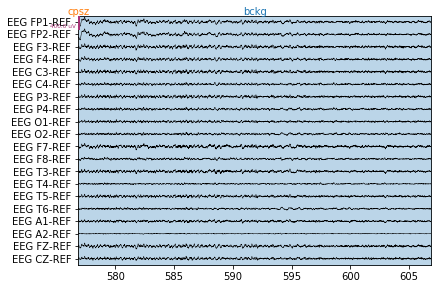

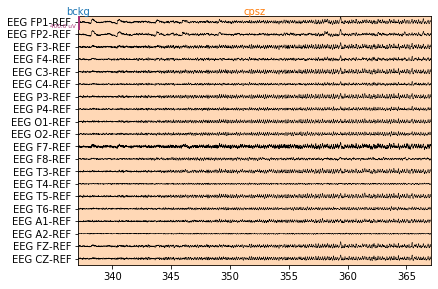

In [ ]:
for class_code in tse_eve['Code'].unique():
    code_events = tse_eve.where(tse_eve['Code'] == class_code).dropna()
    tuh_mne_object.plot(start = code_events.sample(random_state = 0)['Start'].values[0], 
                    duration = 30, **plot_kwargs)

In [ ]:
new_dict = {}
list_to_drop = []
for cha_name in tuh_mne_object.info_meta_data['ch_names']:
    name_to_change=None
    if re.findall('\w+',cha_name)[0] == 'EEG':
        if not re.findall('ROC|LOC|EKG|26|27|28|29|30|T1|T2',cha_name):
            name_to_change = re.findall('\w+',cha_name)[1].title()
        else:
            list_to_drop.append(cha_name)
    else:
        list_to_drop.append(cha_name)
    if name_to_change:
        # condition to check if data is already in the list to change 
        if name_to_change in list(new_dict.values()):
            list_to_drop.append(cha_name)
        else:
            new_dict[cha_name] = name_to_change

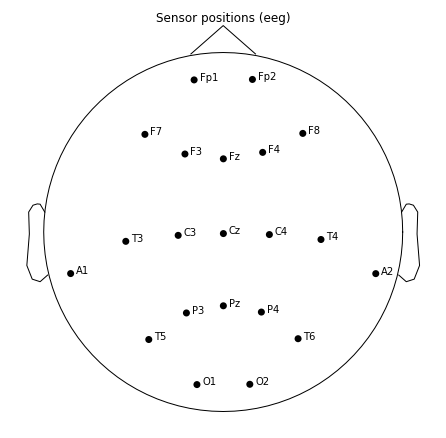

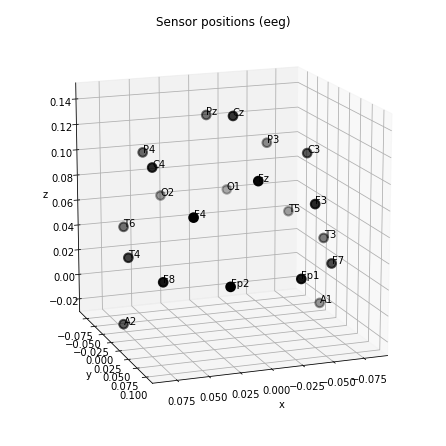

In [ ]:


# drop irrelevent or duplicated
tuh_mne_object.drop_channels(list_to_drop)
tuh_mne_object.rename_channels(new_dict)
tuh_mne_object.set_montage('standard_1020')

tuh_mne_object.plot_sensors(kind='topomap', show_names=True, to_sphere=True);
fig = tuh_mne_object.plot_sensors(kind='3d', show_names=True, show=False)
fig = fig.gca().view_init(azim=70, elev=15)
plt.show()

In [ ]:

# for seiz_type in complete_f_info['Seizure Type'].unique():
#     try:
#         math.isnan(seiz_type)
#     except:
#         seiz_type_files = complete_f_info[complete_f_info['Seizure Type']==seiz_type]['Filename']
#         seiz_type_file = seiz_type_files.sample().values[0]
#         print(color.BOLD+color.UNDERLINE+seiz_type_file.split('/')[-1][:-3]+color.END)
#         seiz_edf_name = seiz_type_file.split('/')[-1][:-3]+'edf'
#         seiz_tse_name = 'TUH Database'+'/'+seiz_type_file.split('/')[-1]

#         seziure_data, seziure_frequency_rangeuency = load_data_from_file('TUH Database'+'/'+seiz_edf_name)
#         tse_eve = pd.read_csv(seiz_tse_name, skiprows=1, sep = ' ', header=None,
#                                  names =['Start', 'End', 'Code', 'Certainty'])

#         tuh_mne_object = mne_meta_data(seziure_data, seziure_frequency_rangeuency, tse_eve)

#         for class_code in tse_eve['Code'].unique():
#             code_events = tse_eve.where(tse_eve['Code'] == class_code).dropna()
#             tuh_mne_object.plot(start = code_events.sample(random_state = 0)['Start'].values[0], 
#                             duration = 30, **plot_kwargs)

#Pre-Processing

Utiltity funtions for computing different values are defined to be used at alter stages such as 
* band power computation 
* Plotting Scalogram for wavelets
*  wavelets decompositions computation
* Power Measure Channel Computation
* Computing Power Measure data in correct format
* Plots wavelets figures 

In [ ]:

def computer_band_power(data, sf, band, output = False):
    band = np.asarray(band)
    lowest_Freq, highest_freq = band
    freq_ranges, p_s_d = welch(data, 
                       sf, 
                       nperseg=(2 / lowest_Freq)*sf,
                       scaling='density', 
                       axis=0)
    p_s_d = pd.DataFrame(p_s_d, index = freq_ranges, columns = data.columns)
    
    if output:
        print(color.BOLD+'Welch Output'+color.END)
        p_s_d.index.name = 'Hz'
        p_s_d.columns = ['Power']
        display(p_s_d)
    
    # to find closest indexes
    index_minimum = np.argmax(np.round(freq_ranges) > lowest_Freq) - 1
    index_maximum = np.argmax(np.round(freq_ranges) > highest_freq)
    # slecet desired frequency ranges
    p_s_d = p_s_d.iloc[index_minimum:index_maximum,:]
    p_s_d = p_s_d.mean()
    
    if output:
        print(color.BOLD+'\nMean frequency_rangeuency Band'+color.END)
        display(p_s_d)
    
    return p_s_d

In [ ]:
def scalogram_plot_c_wavelet(signal, wavelet_data, class_name):
  
  cmap = plt.cm.cool
  x = range(len(signal))
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(wavelet_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax, 
              cbar_kws={"ticks":[]}
              )
  spec_ax.invert_yaxis()
  plt.show()

In [ ]:
def compute_wavelet_decomposition(data, output=False):
    level = 6

    frequency_rangeuencies = np.array([seziure_frequency_rangeuency]*level)
    j = [1<<exp for exp in range(level)]
    frequency_rangeuencies = frequency_rangeuencies/j
    data_t = data.transpose()
    list_of_coeffs_wavelets = wavedec(data_t.values, wavelet='db4', level=level, mode='per')
    nums = list(range(1,level+1))
    comp_names_list = []
    for k in nums:
        comp_names_list.append('D' + str(k))
    comp_names_list.append('A' + str(nums[-1]))
    # reverse them
    comp_names_list = comp_names_list[::-1] 
    wavelets = pd.DataFrame()
    # convert list into df
    for k, array in enumerate(list_of_coeffs_wavelets):
        level_df = pd.DataFrame(array).T
        level_df.columns = [comp_names_list[k]]
        if wavelets.empty:
            wavelets = level_df
        else:
            wavelets = pd.concat([wavelets,level_df], axis=1)
    # remove irrelvent  levels data
    regex = re.compile('D')
    bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
    decom_wavelets = wavelets.drop(bad_items, axis=1)
    
    if output:
        display(decom_wavelets.head())
    
    return decom_wavelets, frequency_rangeuencies

In [ ]:


def plot_wavelets_fig(wavelet):

    fig, axs = plt.subplots(3,2, figsize=(11,11), squeeze =True, sharex=True, sharey=True)
    axs = axs.flatten()
    for k, level in enumerate([1, 2, 3, 4, 10, 15]):
        try:
            [psi, x] = wavelet.wavefun(level=level)
        except:
            [phi, psi, x] = wavelet.wavefun(level=level)
        axs[k].plot(x, psi)
        axs[k].text(0.85, 0.9, "Level = "+str(level), ha='center', va='center', transform=axs[k].transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [ ]:

def compute_power_measure_channels(data, frequency_range, output=False):

  new_welch_dataframe = pd.DataFrame()
  for cha_name in data:
    channel_data_frame = pd.DataFrame(computer_power_measures_data(pd.DataFrame(data[cha_name])))
    channel_data_frame['channel'] = cha_name
    channel_data_frame.index.name = 'feature'
    channel_data_frame = channel_data_frame.set_index('channel', append=True)
    channel_data_frame = channel_data_frame.swaplevel()

    if new_welch_dataframe.empty:
        new_welch_dataframe = channel_data_frame
    else:
        new_welch_dataframe = pd.concat([new_welch_dataframe, channel_data_frame])

  new_welch_dataframe = new_welch_dataframe.T

  if output:
    display(new_welch_dataframe.head())
    
  return new_welch_dataframe

In [ ]:
def computer_power_measures_data(data, output=False):
    bandpasses = [[[0.1,4],'power_delta'],
                  [[4,8],'power_theta'],
                  [[8,12],'power_alpha'],
                  [[12,30],'power_beta'],
                  [[30,70],'power_gamma']
                 ]
    
    new_welch_dataframe = pd.DataFrame()
    for bandpass, frequency_range_name in bandpasses:
        bandpass_data = computer_band_power(data, s_rate, bandpass)
        bandpass_data.index = [frequency_range_name]
        
        if new_welch_dataframe.empty:
            new_welch_dataframe = bandpass_data

        else:
            new_welch_dataframe = pd.concat([new_welch_dataframe, bandpass_data])
        
    new_welch_dataframe = new_welch_dataframe.T
    
    if output:
        display(new_welch_dataframe)
    
    return new_welch_dataframe

In [ ]:

sampling_f = 250
freq_p = 40.
nyquist_frequency_range = sampling_f / 2. 
frequency_range = [0, freq_p, freq_p, nyquist_frequency_range]
gain_value = [1, 1, 0, 0]
n = int(round(1 * sampling_f))
n -= n % 2 - 1 

In [ ]:
# centre of sinc function
t = np.arange(-(n // 2), n // 2 + 1) / sampling_f  
h = np.sinc(2 * freq_p * t) / (4 * np.pi)
flim = (1., sampling_f / 2.)
fig = plot_filter(h, sampling_f, frequency_range, gain_value, 'No Window', flim=flim, compensate=True)

In [ ]:
textstr = '\n'.join((
    'Pass-band frequency_range: '+str(freq_p),
    'Filter Length: 1s'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
# fig.text(0.7, 0.9, textstr, fontsize=14, bbox=props)

# plt.show()

In [ ]:
transition_bandwidth = 10 
f_s = freq_p + transition_bandwidth

frequency_range = [0., freq_p, f_s, nyquist_frequency_range]
gain_value = [1., 1., 0., 0.]
h = signal.firwin2(n, frequency_range, gain_value, nyquist_frequency_range=nyquist_frequency_range)
fig = plot_filter(h, sampling_f, frequency_range, gain_value, 'Windowed',
                  flim=flim, compensate=True)

In [ ]:

textstr = '\n'.join((
    'Pass-band frequency_range: '+str(freq_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(transition_bandwidth)+' Hz'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# # place a text box in upper left in axes coords
# fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

# plt.show()

#FIR

Up to 40Hz, a perfect FIR lowpass filter would exhibit magnitude response of 1, which would transition to magnitude response of 0 up to the Nyquist frequency1. However, the filter response's abrupt discontinuity results in ringing in the temporal domain.
 
* The Nyquist frequency is half our sample rate 
patch attributes

*   Include matplotlib.patch attributes


*   Filter the EEG signal using designed filter and see the result





In [ ]:
low_frequency_rangeuency = None
high_frequency_rangeuency = 40
method = 'fir'
fir_design = 'firwin2'
sampling_frequency_rangeuency = tuh_mne_object.info_meta_data['sampling_frequency_rangeuency']

In [ ]:
filter_parameters = mne.filter.create_filter(tuh_mne_object.get_data(), sampling_frequency_rangeuency,
                                         low_frequency_rangeuency=low_frequency_rangeuency, high_frequency_rangeuency=high_frequency_rangeuency, 
                                         fir_design=fir_design)

In [ ]:

filter_data = tuh_mne_object.filter(low_frequency_rangeuency, high_frequency_rangeuency,
                           method=method, 
                           fir_design=fir_design)

Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165 samples (0.660 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 165 samples (0.660 sec)



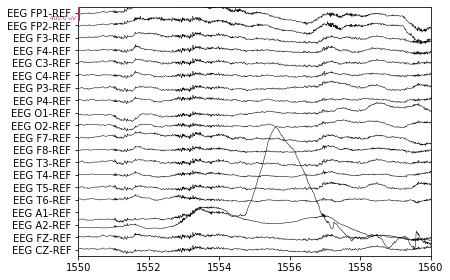

In [ ]:

plot = filter_data.plot(scalings = dict(eeg=20e-5),
                      start = 1550,
                      duration = 10,
                      show =True,
                      show_scrollbars=False)

## IIR

They are so called because an IIR filter could continually produce a signal if just a single pulse was used as the input.

It computes a weighted total of the input samples, much as FIR filters, but it additionally adds a weighted sum of the prior output samples1. IIR filters rely on the cutoff frequency for both attenuation and delay, but this also results in variations in phase delay, with low-frequency signals being delayed longer than high-frequency signals.

Butterworth and elliptic filters are two popular IIR filters.
Design and apply these filters to original EEG signal 

In [ ]:
print(color.BOLD+color.UNDERLINE+'Butterworth'+color.END)

Butterworth
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



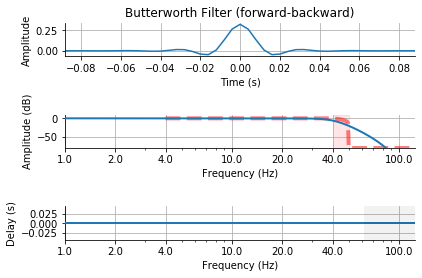

Elliptic
Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
elliptic lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -0.00 dB



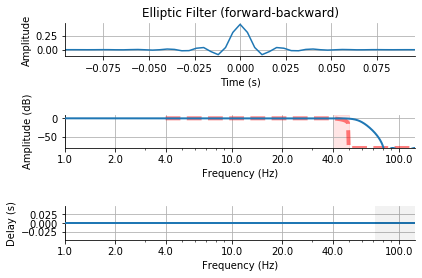

In [ ]:



IIR_parameters = dict(order=4, ftype='butter')
filter = mne.filter.create_filter(tuh_mne_object.get_data(), sampling_frequency_rangeuency, low_frequency_rangeuency=None, high_frequency_rangeuency=freq_p,
                                method='iir', IIR_parameters=IIR_parameters,
                                verbose=True)
fig=plot_filter(filter, sampling_frequency_rangeuency, frequency_range, gain_value, 'Butterworth Filter', flim=flim,
                compensate=True)

plt.show()

print(color.BOLD+color.UNDERLINE+'Elliptic'+color.END)

IIR_parameters = dict(order=4, ftype='elliptic', rp=0.0025, rs=40)
filter = mne.filter.create_filter(tuh_mne_object.get_data(), sampling_frequency_rangeuency, low_frequency_rangeuency=None, high_frequency_rangeuency=freq_p,
                                method='iir', IIR_parameters=IIR_parameters,
                                verbose=True)

fig=plot_filter(filter, sampling_frequency_rangeuency, frequency_range, gain_value, 'Elliptic Filter', flim=flim,
                compensate=True)

We will now just choose the frequency range from this output that interests us and get a mean value.

* provide the highest frequency that interests you.
* Find the nearest band indices in the frequency vector, choose the desired     frequencies, 
* then calculate the mean of each channel throughout the band.

In [ ]:
# sampling rate in Hz
s_rate = 173.61 
lowest_Freq = 8
highest_freq = 12
freq_ranges, p_s_d = welch(baseline_df, 
                   s_rate, 
                   nperseg=(2 / lowest_Freq)*s_rate,
                   scaling='density', 
                   axis=0)
index_minimum = np.argmax(np.round(freq_ranges) > lowest_Freq) - 1
index_maximum = np.argmax(np.round(freq_ranges) > highest_freq)

In [ ]:

p_s_d = pd.DataFrame(p_s_d, index = freq_ranges, columns = baseline_df.columns)

print(color.BOLD+'Welch Output'+color.END)
p_s_d.index.name = 'Hz'
p_s_d.columns = ['Power']
display(p_s_d)

Welch Output


,Power
Hz,
0.000000,889.360582
4.037442,5683.980504
8.074884,2434.988822
12.112326,840.116911
16.149767,468.925355
20.187209,200.082613
24.224651,68.433595
28.262093,27.860948
32.299535,19.928694


In [ ]:

p_s_d = p_s_d.iloc[index_minimum:index_maximum,:]
p_s_d = p_s_d.mean()

In [ ]:

print(color.BOLD+'\nMean frequency_rangeuency Band'+color.END)
display(p_s_d)


Mean Frequency Band


Power    1637.552866
dtype: float64

In [ ]:


baseline_band_power = computer_band_power(baseline_df, s_rate, [8,12], output=False)

CPU times: user 1.96 ms, sys: 0 ns, total: 1.96 ms
Wall time: 1.96 ms


In [ ]:


print(color.BOLD+color.UNDERLINE+'Baseline Mean Power'+color.END)
baseline_band_power = computer_power_measures_data(baseline_df, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Power'+color.END)
seizure_power = computer_power_measures_data(seizure_df, output=True)

Baseline Mean Power


power_delta    18864.764238
power_theta     4398.892010
power_alpha     1637.552866
power_beta       461.728763
power_gamma      124.460181
dtype: float64


Seizure Mean Power


power_delta     9811.958106
power_theta    14371.740718
power_alpha     5207.634127
power_beta      1088.598329
power_gamma      265.594331
dtype: float64

In [ ]:
%%time

example_power_measure = compute_power_measure_channels(seizure_df, 
                                               seziure_frequency_rangeuency, 
                                               output=True)

channel EEG FP1-REF                          ...  EEG T2-REF                       
feature power_delta power_theta power_alpha  ... power_alpha power_beta power_gamma
0        667.395217  129.775243   54.145163  ...   45.048349  10.559601    4.024451

[1 rows x 115 columns]

CPU times: user 4.02 s, sys: 29.1 ms, total: 4.05 s
Wall time: 4.06 s


## Wavelets

A wavelet transformation is yet another typical spectrum analysis method (WT).

Wavelets may be used to represent discontinuities brought on by recording equipment5, analyse time series with nonstationary power in various frequency bands, and locate and remove artefacts.

A signal is projected with many oscillatory kernel-based wavelets, which separate the data into several frequency components and analyse each one according to its scale. A "family" wavelet is a set of functions that may be defined through dilation, which involves expanding or contracting a wavelet and shifting it to various points in time (translation).
Check available wavelets families

In [ ]:
# available wavelets families
families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [ ]:

# haar wavelets parameters
wavelet = Wavelet('Haar')
print(wavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


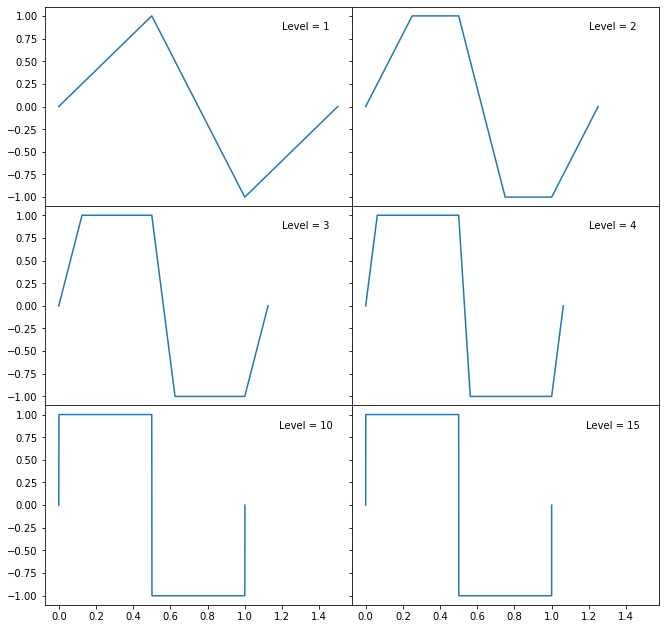

In [ ]:

plot_wavelets_fig(wavelet)

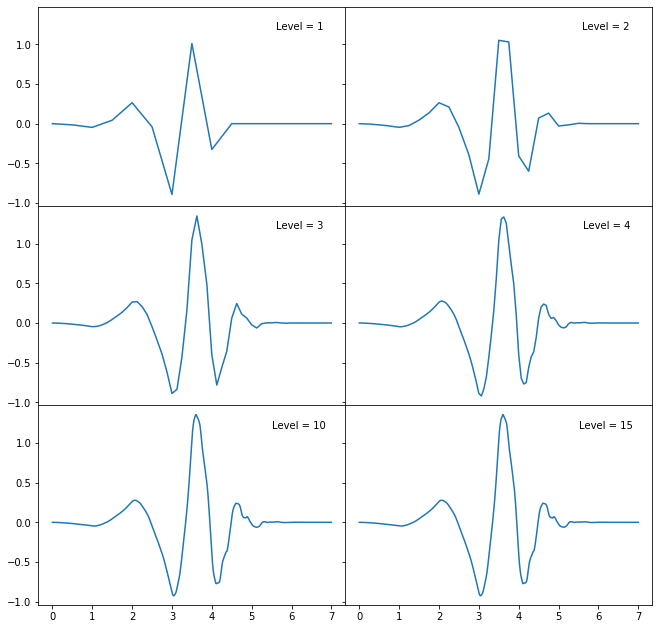

In [ ]:
plot_wavelets_fig(Wavelet('db4'))



* Transpose the data since it is a time-series 
* retrieve the wavelet coefficients at each level in a list, 
* and the number of levels we are interested in

In [ ]:
# wavelet levels
level = 6
data_t = baseline_df.transpose()

In [ ]:
#list of wavelets co efficients at each level
list_of_coeffs_wavelets = wavedec(data_t.values, wavelet='db4', level=level)

In [ ]:

print(type(list_of_coeffs_wavelets))
print(color.BOLD+color.UNDERLINE+'\nExample first array'+color.END)
list_of_coeffs_wavelets[0]

<class 'list'>

Example first array


array([[ 1181.70402535,  1222.31934684,  1186.58114564,  1119.30615032,
         1604.0324783 ,    25.89019047,  1780.72838765,  -973.90578049,
         1220.89183062,  1293.42816916,   969.47947677,  -157.9270515 ,
         -563.78624385,  -932.26288111,    -9.97373656, -1153.16884245,
         -388.46627896,  -978.83447438,   825.79767601, -2068.52191341,
         -902.76616695,  -907.06309716,    33.94486868,  -323.56923264,
        -1303.9367751 ,   341.99794327, -1239.81391063, -1374.40588055,
         2176.67574815,  -873.9977607 ,   136.07105931,  -576.83053461,
        -1754.71926172, -1129.91038679,  2414.20323465,  2157.9675786 ,
         2817.67685717,  -206.68406909,   418.16443435,  2386.0601948 ,
          686.29657472, -1793.06453077,  2091.92878426, -1253.63309753,
         -921.75978608, -2782.32520904,    44.8599721 , -2744.14365319,
          685.7713572 ,   444.34853778,  -540.8882925 ,  -131.68367604,
           15.37213474,  1753.78765896, -1375.40957813,  1227.31

In [ ]:

nums = list(range(1,level+1))
comp_names_list=[]

In [ ]:

for k in nums:
    comp_names_list.append('D' + str(k))
comp_names_list.append('A' + str(nums[-1]))
# reverse them
comp_names_list = comp_names_list[::-1] 


In [ ]:
# empty dataframe of wavelets
wavelets = pd.DataFrame()

In [ ]:

# convert list into df
for k, array in enumerate(list_of_coeffs_wavelets):
    level_df = pd.DataFrame(array).T
    level_df.columns = [comp_names_list[k]]
    if wavelets.empty:
        wavelets = level_df
    else:
        wavelets = pd.concat([wavelets,level_df], axis=1)

In [ ]:

wavelets.head()

,A6,D6,D5,D4,D3,D2,D1
0,1181.704025,-2.681982,0.645221,0.762090,-13.145503,-2.082229,1.034561
1,1222.319347,-3.841698,4.815476,5.851161,-40.035244,-7.686451,2.091650
2,1186.581146,101.168531,124.613694,49.381880,40.524474,6.152228,3.416285
3,1119.306150,-1546.522140,260.010805,-126.090877,23.713159,0.368236,18.439460
4,1604.032478,-1840.435598,443.348137,66.655876,59.011389,1.185516,5.938704


In [ ]:
# remove irrelevent levels data
regex = re.compile('D')
bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
decompose_wavelets = wavelets.drop(bad_items, axis=1)

In [ ]:

decompose_wavelets.head()

,D6,D5,D4,D3,D2,D1
0,-2.681982,0.645221,0.762090,-13.145503,-2.082229,1.034561
1,-3.841698,4.815476,5.851161,-40.035244,-7.686451,2.091650
2,101.168531,124.613694,49.381880,40.524474,6.152228,3.416285
3,-1546.522140,260.010805,-126.090877,23.713159,0.368236,18.439460
4,-1840.435598,443.348137,66.655876,59.011389,1.185516,5.938704


In [ ]:
%%time

print(color.BOLD+color.UNDERLINE+'Baseline Wavelets'+color.END)
baseline_wavelets, frequency_rangeuencies = compute_wavelet_decomposition(baseline_df.iloc[:-1], output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Wavelets'+color.END)
seizure_wavelets, frequency_rangeuencies = compute_wavelet_decomposition(seizure_df.iloc[:-1], output=True)

Baseline Wavelets


,D6,D5,D4,D3,D2,D1
0,-1273.602570,-105.529467,-411.084913,-76.666336,-58.264662,2.594395
1,-1901.927267,-527.481613,233.724596,-27.684363,33.707564,-15.448868
2,-116.482456,144.051343,-194.748234,-52.546593,-17.441654,-11.257192
3,-47.260208,122.352150,1307.087703,64.925132,30.353437,13.965831
4,-2056.561156,-1192.531728,-630.414718,88.967453,-2.354381,22.606331



Seizure Wavelets


,D6,D5,D4,D3,D2,D1
0,77.459769,-2201.499253,-158.072735,81.904482,17.369233,-1.235788
1,84.452880,-473.377303,592.446067,-693.510413,3.005205,-0.680125
2,-42.688829,996.665622,-65.619967,309.412207,-12.285318,-0.702219
3,92.475661,2004.550368,-76.338451,16.967975,82.103411,-3.117101
4,-347.099179,-1154.230952,-272.987001,-59.487952,-17.700552,8.254308


CPU times: user 49.6 ms, sys: 869 µs, total: 50.4 ms
Wall time: 53.2 ms


* Plot the signal and the wavelet packet coefficients
* plot the spectrogram.

In [ ]:


def scalogram_plot_for_d_wavelets(signal, wavelet_data, frequency_rangeuencies, class_name):
  
  cmap = plt.cm.cool
  x = range(len(signal))
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  exp_list = [2<<exp for exp in range(wavelet_data.shape[1]+1)]
  wavelet_data = wavelet_data.copy()
  for k, decom in enumerate(wavelet_data.sort_index(1).columns):
    exponent_data = wavelet_data[decom].dropna().repeat(exp_list[k]).reset_index(drop=True)
    if k == 0:
      plot_data = pd.DataFrame(exponent_data.abs(), 
                               columns =[decom])
    else:
      plot_data = pd.concat([plot_data, pd.DataFrame(exponent_data.abs(), columns =[decom])], axis=1)
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(plot_data.T, ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax, 
              cbar_kws={"ticks":[]}
              )
  plt.show()
  print(frequency_rangeuencies)

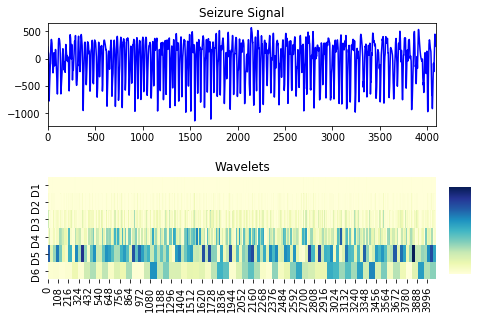

[250.     125.      62.5     31.25    15.625    7.8125]


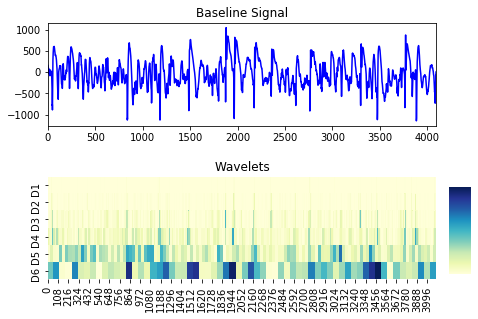

[250.     125.      62.5     31.25    15.625    7.8125]


In [ ]:

scalogram_plot_for_d_wavelets(seizure_df, 
               seizure_wavelets, 
               frequency_rangeuencies, 'Seizure')

scalogram_plot_for_d_wavelets(baseline_df, 
               baseline_wavelets, 
               frequency_rangeuencies, 'Baseline')

In [ ]:
def compute_absolute_mean_val(data, output=False):
    abs_mean_d = data.abs().mean()
    
    abs_mean_d.index += '_mean_abs'
    
    if output:
        display(abs_mean_d)
    
    return abs_mean_d
def compute_coeffs_standard_deviation(data, output=False):
    standard_deviation_d = data.std()
    
    standard_deviation_d.index += '_std'
    
    if output:
        display(standard_deviation_d)
    
    return standard_deviation_d

def compute_ratio_val(data, output=False):
    data = data.abs().mean()
    levels_t = list(data.index)
    ratio_d=pd.Series(index=data.index)
    for level_no in range(0, len(levels_t)):
        if level_no == 0:
            ratio_d.loc[levels_t[level_no]] = \
            data.loc[levels_t[level_no]]/data.loc[levels_t[level_no+1]]
        elif level_no == len(levels_t)-1:
            ratio_d.loc[levels_t[level_no]] = \
            data.loc[levels_t[level_no]]/data.loc[levels_t[level_no-1]]
        else:
            before = data.loc[levels_t[level_no-1]]
            after = data.loc[levels_t[level_no+1]]
            mean_data = (before+after)/2

            ratio_d.loc[levels_t[level_no]] = \
            data.loc[levels_t[level_no]]/mean_data

    ratio_d.index += '_Ratio'
    
    if output:
        display(ratio_d)
    
    return ratio_d

In [ ]:

    
print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
compute_absolute_mean_val(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
compute_absolute_mean_val(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


D6_mean_abs    1181.644379
D5_mean_abs     660.597972
D4_mean_abs     280.960459
D3_mean_abs     119.135523
D2_mean_abs      32.615104
D1_mean_abs       6.904362
dtype: float64


Seizure Mean Absolute Wavelets


D6_mean_abs     700.274334
D5_mean_abs    1216.583240
D4_mean_abs     637.978335
D3_mean_abs     200.546928
D2_mean_abs      39.975884
D1_mean_abs       5.371364
dtype: float64

In [ ]:

    
print(color.BOLD+color.UNDERLINE+'Baseline Standard Deviation Wavelets'+color.END)
compute_coeffs_standard_deviation(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Standard Deviation Wavelets'+color.END)
compute_coeffs_standard_deviation(seizure_wavelets, output=True)

Baseline Standard Deviation Wavelets


D6_std    1449.617725
D5_std     824.775365
D4_std     403.832764
D3_std     210.542003
D2_std      61.329526
D1_std      16.024182
dtype: float64


Seizure Standard Deviation Wavelets


D6_std     840.907751
D5_std    1394.240662
D4_std     785.440416
D3_std     267.335032
D2_std      60.872012
D1_std       8.150676
dtype: float64

In [ ]:

print(color.BOLD+color.UNDERLINE+'Baseline Ratio Wavelets'+color.END)
compute_ratio_val(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Ratio Wavelets'+color.END)
compute_ratio_val(seizure_wavelets, output=True)

Baseline Ratio Wavelets


D6_Ratio    1.788750
D5_Ratio    0.903317
D4_Ratio    0.720658
D3_Ratio    0.759852
D2_Ratio    0.517536
D1_Ratio    0.211692
dtype: float64


Seizure Ratio Wavelets


D6_Ratio    0.575607
D5_Ratio    1.818167
D4_Ratio    0.900381
D3_Ratio    0.591624
D2_Ratio    0.388269
D1_Ratio    0.134365
dtype: float64

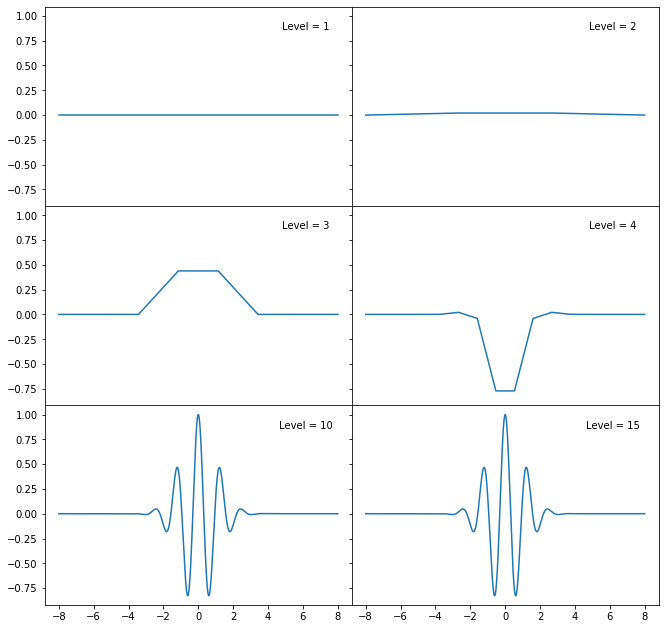

In [ ]:

plot_wavelets_fig(ContinuousWavelet('morl'))

In [ ]:


print(color.BOLD+color.UNDERLINE+'Baseline Wavelets'+color.END)
baseline_wavelets, frequency_rangeuencies = compute_wavelet_decomposition(baseline_df.iloc[:-1],  output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Wavelets'+color.END)
seizure_wavelets, frequency_rangeuencies  = compute_wavelet_decomposition(seizure_df.iloc[:-1],  output=True)

Baseline Wavelets


,D6,D5,D4,D3,D2,D1
0,-1273.602570,-105.529467,-411.084913,-76.666336,-58.264662,2.594395
1,-1245.339372,-57.151614,-428.615430,-53.684694,-45.140779,10.195646
2,-1200.475794,-4.130656,-433.927375,-21.693524,-19.696615,-15.448868
3,-1138.352183,47.441005,-430.417979,-7.945208,9.743360,18.439460
4,-1059.187438,94.817604,-421.560644,-10.516593,33.707564,-11.257192



Seizure Wavelets


,D6,D5,D4,D3,D2,D1
0,77.459769,-2201.499253,-158.072735,81.904482,17.369233,-1.235788
1,141.464637,-1944.860140,-387.971624,239.564932,10.694653,2.744152
2,200.560585,-1655.287038,-602.283827,393.998362,10.990782,-0.680125
3,254.623250,-1337.305708,-766.077301,456.899861,8.377455,1.448993
4,303.105157,-995.118352,-851.053985,351.999336,3.005205,-0.702219


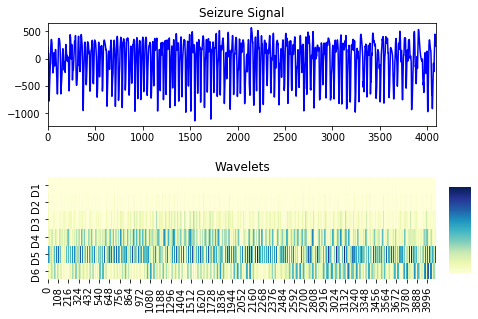

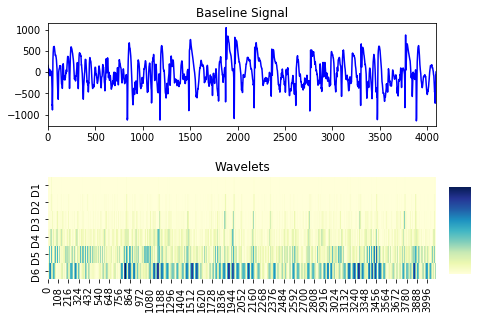

In [ ]:


scalogram_plot_c_wavelet(seizure_df, 
               seizure_wavelets, 
               None, 'Seizure')

scalogram_plot_c_wavelet(baseline_df, 
               baseline_wavelets, 
               None, 'Baseline')

## Scaling

Two types of scalings are performed  standardisation and normalisation.

By detrending the signal by eliminating the mean or scaling to a unit variance to a range of 0–1, such as using min–max scaling, normalisation puts signals into a common range so they may be compared. When comparing data from various recording devices or researchers, normalisation is especially important since the mean of a single electrode recording varies on the amplifier strength.

Similar standardisation techniques are used, but this time the feature columns are centred at mean 0 and standard deviation 1, giving the features a normal distribution. It makes it simpler for the model to learn weights and makes the method less susceptible to outliers than min-max scaling, making it especially helpful for classifiers that employ optimization techniques, such logistic regression and SVM.

In [ ]:


min_max_scaler_i = MinMaxScaler()
wav_mms = min_max_scaler_i.fit_transform(seizure_wavelets)

sc = StandardScaler()
wavelet_scale_d = sc.fit_transform(seizure_wavelets)

print(color.BOLD+color.UNDERLINE+'Before Scaling'+color.END)
display(seizure_wavelets.head())
print(color.BOLD+color.UNDERLINE+'After MinMaxScaler'+color.END)
display(pd.DataFrame(wav_mms).head())
print(color.BOLD+color.UNDERLINE+'After StandardScaler'+color.END)
display(pd.DataFrame(wavelet_scale_d).head())

Before Scaling


,D6,D5,D4,D3,D2,D1
0,77.459769,-2201.499253,-158.072735,81.904482,17.369233,-1.235788
1,141.464637,-1944.860140,-387.971624,239.564932,10.694653,2.744152
2,200.560585,-1655.287038,-602.283827,393.998362,10.990782,-0.680125
3,254.623250,-1337.305708,-766.077301,456.899861,8.377455,1.448993
4,303.105157,-995.118352,-851.053985,351.999336,3.005205,-0.702219


After MinMaxScaler


,0,1,2,3,4,5
0,0.539197,0.166839,0.520094,0.616478,0.506226,0.482139
1,0.551367,0.207598,0.465280,0.694638,0.496771,0.515784
2,0.562604,0.253588,0.414182,0.771199,0.497191,0.486836
3,0.572883,0.304090,0.375130,0.802382,0.493489,0.504835
4,0.582101,0.358436,0.354869,0.750378,0.485879,0.486649


After StandardScaler


,0,1,2,3,4,5
0,0.089440,-1.620134,-0.195415,0.301219,0.290862,-0.150990
1,0.163344,-1.431268,-0.479624,0.881043,0.179091,0.335283
2,0.231580,-1.218164,-0.744565,1.449000,0.184050,-0.083098
3,0.294004,-0.984154,-0.947052,1.680332,0.140287,0.177039
4,0.349985,-0.732331,-1.052103,1.294541,0.050325,-0.085798
